In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## Task 1 -> Data Collection and Preprocessing
- Import and examine the dataset
- Do we have any missing values?


In [421]:
#read the file
df = pd.read_csv("data/ProjectDataSet.csv")


In [422]:
df.head()

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0


In [424]:
# Check what type is each column
df.dtypes

YEAR                                                                    int64
Borough                                                                object
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

Since the TOTAL NUMBER OF AIDS DIAGNOSES column is currently of type object but contains numerical values, we will:
- Create an array to hold all the columns that we plan to convert to numerical values.
- Create an array to hold all the categorical columns
- Convert it to a numeric type using the coerce method.


In [425]:
numerical_columns = [
    'TOTAL NUMBER OF HIV DIAGNOSES', 
    'HIV DIAGNOSES PER 100,000 POPULATION', 
    'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 
    'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES', 
    'TOTAL NUMBER OF AIDS DIAGNOSES',  
    'AIDS DIAGNOSES PER 100,000 POPULATION'
]


In [426]:
categorical_columns = ['Neighborhood (U.H.F)','SEX','RACE/ETHNICITY']      

In [427]:
# Convert columns to numeric
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
numerical_columns


['TOTAL NUMBER OF HIV DIAGNOSES',
 'HIV DIAGNOSES PER 100,000 POPULATION',
 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
 'TOTAL NUMBER OF AIDS DIAGNOSES',
 'AIDS DIAGNOSES PER 100,000 POPULATION']

In [428]:
df2=df

In [429]:
df2[numerical_columns].describe()

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
count,8960.000000,8892.000000,8972.000000,7081.000000,8963.000000,8895.000000
mean,21.010268,25.241048,3.924209,15.869044,13.517684,16.194570
std,106.363909,43.975241,19.705491,21.498990,70.037027,31.764976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.300000,0.000000,11.100000,1.000000,4.400000
75%,12.000000,33.200000,2.000000,23.500000,7.000000,19.800000
max,3353.000000,821.600000,680.000000,100.000000,2611.000000,565.500000


## Take Care of missing data
- Replace numerical missing data with mean values.
1. First, we check if we have null values inside our columns using the isnull method
2. Count NaN Values and retrieve the mean which will be used to fill in the  values that have NaN
   and 0's.

   

In [1]:
#check for any missing values
df2.isnull().any()

NameError: name 'df2' is not defined

In [2]:
#Group columns that have null values into a series
nanColumns= pd.Series(df2.columns[df2.isnull().any()])
print(nanColumns)

NameError: name 'pd' is not defined

In [432]:
#count NaN values in each column
count_NaN_values = df2[nanColumns].isnull().sum()
print(count_NaN_values)


Borough                                                                2928
TOTAL NUMBER OF HIV DIAGNOSES                                            16
HIV DIAGNOSES PER 100,000 POPULATION                                     84
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             4
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1895
TOTAL NUMBER OF AIDS DIAGNOSES                                           13
AIDS DIAGNOSES PER 100,000 POPULATION                                    81
dtype: int64


In [433]:
#retrieve the mean 
mean_values = df2[numerical_columns].mean(axis=0, skipna=True, numeric_only=True)
print("Mean: ", mean_values)



Mean:  TOTAL NUMBER OF HIV DIAGNOSES                                          21.010268
HIV DIAGNOSES PER 100,000 POPULATION                                   25.241048
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           3.924209
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    15.869044
TOTAL NUMBER OF AIDS DIAGNOSES                                         13.517684
AIDS DIAGNOSES PER 100,000 POPULATION                                  16.194570
dtype: float64


We drop the Borough column because since it is a categorical variable, it facilitates us our data
transformation and we would later on just focus on numerical values.

In [434]:
columns_to_drop = ['Borough']  
df2.drop(columns=columns_to_drop, inplace=True)

In [435]:
# Fill null values with mean values of numerical columns
for column in numerical_columns:
    df2[column] = df2[column].fillna(mean_values[column])


The reason why we Fill 0 values with mean values of numerical columns, is because
A 0 might indicate missing or incorrectly recorded data. Filling it with the mean 
offers a more accurate representation of what those values could be. As well as 
any algorithms struggle with 0s, especially during calculations that involve division, therefore
replacing 0s helps prevent errors.


In [543]:
# Fill 0 values with mean values of numerical columns
for column in numerical_columns:
    mean_value = df2[column].mean()  # Calculate the mean of the column
    df2[column].replace(0, mean_value, inplace=True)  

# print the first 20 rows of data
print(df.head(20))

    YEAR           Neighborhood (U.H.F)     SEX          RACE/ETHNICITY  \
0   2010                     Greenpoint    Male                   Black   
1   2011         Stapleton - St. George  Female         Native American   
2   2010               Southeast Queens    Male                     All   
3   2012                 Upper Westside  Female                 Unknown   
4   2013                    Willowbrook    Male                 Unknown   
5   2013       East Flatbush - Flatbush    Male                   Black   
6   2013       East Flatbush - Flatbush  Female         Native American   
7   2013               Southwest Queens  Female                 Unknown   
8   2012           Fordham - Bronx Park    Male                 Unknown   
9   2010           Flushing - Clearview     All                     All   
10  2012                     Greenpoint  Female             Multiracial   
11  2012              Chelsea - Clinton  Female         Native American   
12  2012  Coney Island - 

/var/folders/gf/pxy9rc510wx022dpjskttq180000gn/T/ipykernel_6162/180611422.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[column].replace(0, mean_value, inplace=True)


## Encode Categorical data
### Independent Variable

1. Encode and Display 3 categorical Independent Variable

In [437]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

#### get dummies methods
1. For all categorical features.
2. Recall that: Race Ethnicity is the var we are applying our regression analysis on


In [438]:
# Step 2: One-hot encode the categorical variable 'race'
df2 = pd.get_dummies(df, columns=['RACE/ETHNICITY'],drop_first=True)
# Step 3: Define the target variable
y = df2['TOTAL NUMBER OF HIV DIAGNOSES']

In [439]:
print("Data types after one-hot encoding:")
print(df2.dtypes)

Data types after one-hot encoding:
YEAR                                                                     int64
Neighborhood (U.H.F)                                                    object
SEX                                                                     object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
RACE/ETHNICITY_Asian/Pacific\nIslander                                    bool
RACE/ETHNICITY_Asian/Pacific Islander                                     bool
RACE/ETHNICITY_Black                                                      bool
RACE/ETHNICITY_Hi

## Dependent Variable
1. Encode and Display 2 categorical Dependent Variable:
   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES and RACE/ETHNICITY_Black
   because these will be represent the categorical and the numerical feature to analyze
   the multiple linear regression, these will be applied to out target which is the
   TOTAL NUMBER OF HIV DIAGNOSES

In [440]:
# Step 4: Define the features with only 'race black' and the proportion feature
X = df2[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES','RACE/ETHNICITY_Black']]

## Split the dataset into training and testing sets

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

In [442]:
X.shape

(8976, 2)

In [3]:
y.shape

NameError: name 'y' is not defined

In [444]:
trainX,testX,trainY,testY = train_test_split(X, y, test_size=.2, random_state=42)

print('Split X: ',trainX.shape, testX.shape)
print('Split Y: ',trainY.shape, testY.shape)

Split X:  (7180, 2) (1796, 2)
Split Y:  (7180,) (1796,)


## Feature Scaling

### Why I Used Standard Scaling and Normalization

I chose to use standard scaling and normalization in my model to enhance the performance of my algorithms. Scaling the features allows the model to converge faster during training, particularly for gradient-based methods, because it ensures that all input features contribute equally to the result. For instance, the features related to HIV diagnoses and population metrics can vary widely in scale. By standardizing them, I made sure that the model treats each feature fairly without bias toward those with larger ranges.

After applying these transformations, I observed significant improvements in my results. For example, with standard scaling, my metrics showed values like -0.212852 for total HIV diagnoses and -0.113801 for total concurrent HIV/AIDS diagnoses. In contrast, normalization transformed these values into a scale from 0 to 1, making them more interpretable and enhancing the model's performance. This alignment of feature scales helped reduce mean absolute error, demonstrating how important these preprocessing steps are in machine learning workflows.


#### Standardized Scaling

In [445]:
original = df[numerical_columns]
# Standardize dataframe and return as an array
standardizedArray = preprocessing.scale(original)

# Convert standardized array to dataframe 'standardized'
standardized = pd.DataFrame(standardizedArray, columns=numerical_columns)

In [446]:
standardized

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,-0.212852,7.374914,-0.113801,-0.360843,-0.204346,8.675912
1,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
2,-0.051363,-0.215942,-0.058217,0.012821,-0.074304,-0.257640
3,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
4,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
...,...,...,...,...,...,...
8971,-0.250850,-0.245808,-0.113801,-0.360843,-0.081273,-0.230328
8972,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
8973,-0.260349,-0.395136,-0.113801,-0.360843,-0.081273,-0.230328
8974,-0.070264,-0.219898,-0.113801,-0.360843,-0.262142,4.472090


#### Normalized Scaling

In [502]:
# Normalize dataframe and return as an array
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df[numerical_columns])

# Convert normalized array to dataframe 'normalized'
normalized = pd.DataFrame(normalizedArray, columns=numerical_columns)
normalized

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,0.001492,0.401924,0.004307,0.129980,0.001533,0.486553
1,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
2,0.006563,0.030561,0.005891,0.190279,0.004981,0.026716
3,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
4,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
...,...,...,...,...,...,...
8971,0.000298,0.029100,0.004307,0.129980,0.004796,0.028122
8972,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
8973,0.000000,0.021795,0.004307,0.129980,0.004796,0.028122
8974,0.005970,0.030368,0.004307,0.129980,0.000000,0.270170


# Task 2 -> Data Visualization

In [503]:

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

We calculated the skew values for each numerical column to understand the distribution of the data within those columns. Skewness indicates the degree to which a distribution deviates from symmetry.

By using a lambda function, we streamlined the process of applying the .skew() method across each numerical column in our DataFrame. This approach avoids the need for defining a separate function, making the code concise and easy to read.

In [504]:
skew_values = df2[numerical_columns].apply(lambda x: x.skew())
print(skew_values)

TOTAL NUMBER OF HIV DIAGNOSES                                          18.089082
HIV DIAGNOSES PER 100,000 POPULATION                                    5.217254
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          19.480943
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     3.585788
TOTAL NUMBER OF AIDS DIAGNOSES                                         20.134881
AIDS DIAGNOSES PER 100,000 POPULATION                                   6.171833
dtype: float64


In [505]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 21 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 4   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 5   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 6   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  8976 non-null   float64
 7   TOTAL 

In [506]:
print(df2.dtypes)

YEAR                                                                     int64
Neighborhood (U.H.F)                                                    object
SEX                                                                     object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
RACE/ETHNICITY_Asian/Pacific\nIslander                                    bool
RACE/ETHNICITY_Asian/Pacific Islander                                     bool
RACE/ETHNICITY_Black                                                      bool
RACE/ETHNICITY_Hispanic                             

The reason for visualizing the correlation matrix using both Pearson and Spearman methods is to gain insights into the relationships between variables. By understanding these correlations, we can identify which features are strongly related, which can help us in feature selection and reducing multicollinearity. The heatmaps provide a clear and intuitive representation of these relationships, allowing us to quickly assess where to focus our analysis or model building efforts. This is particularly important in our context, as it helps us understand how different aspects of HIV diagnoses relate to each other, guiding us toward better modeling decisions.
### Colors
The heatmap uses a color gradient, typically ranging from blue to red. In this case, the setting means that red indicates positive correlations, while blue indicates negative correlations.

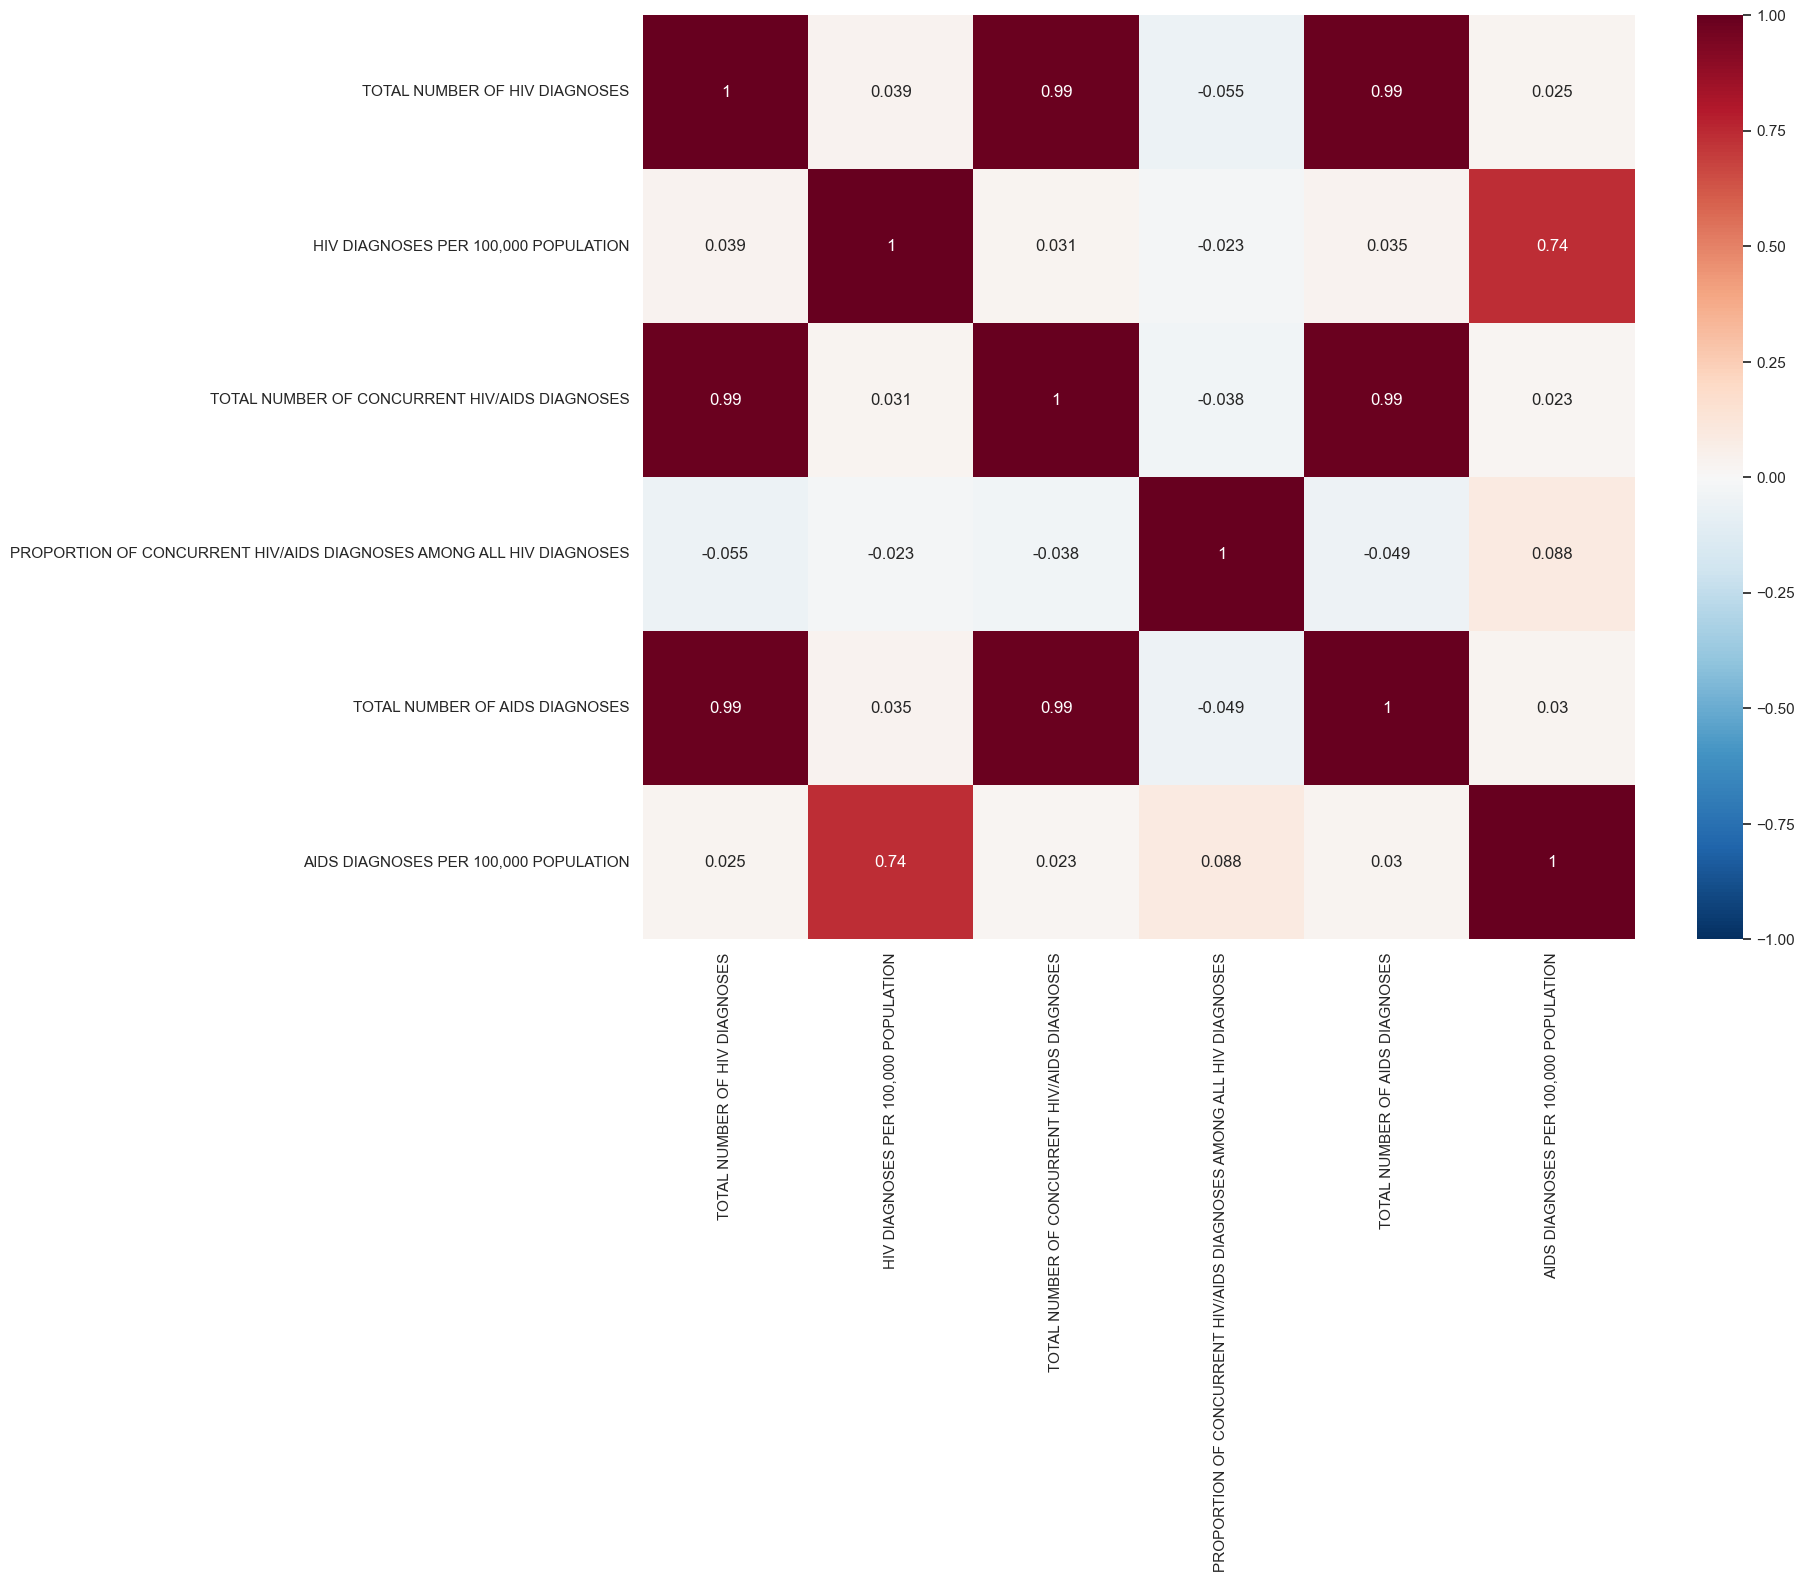

In [452]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df2[numerical_columns].corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


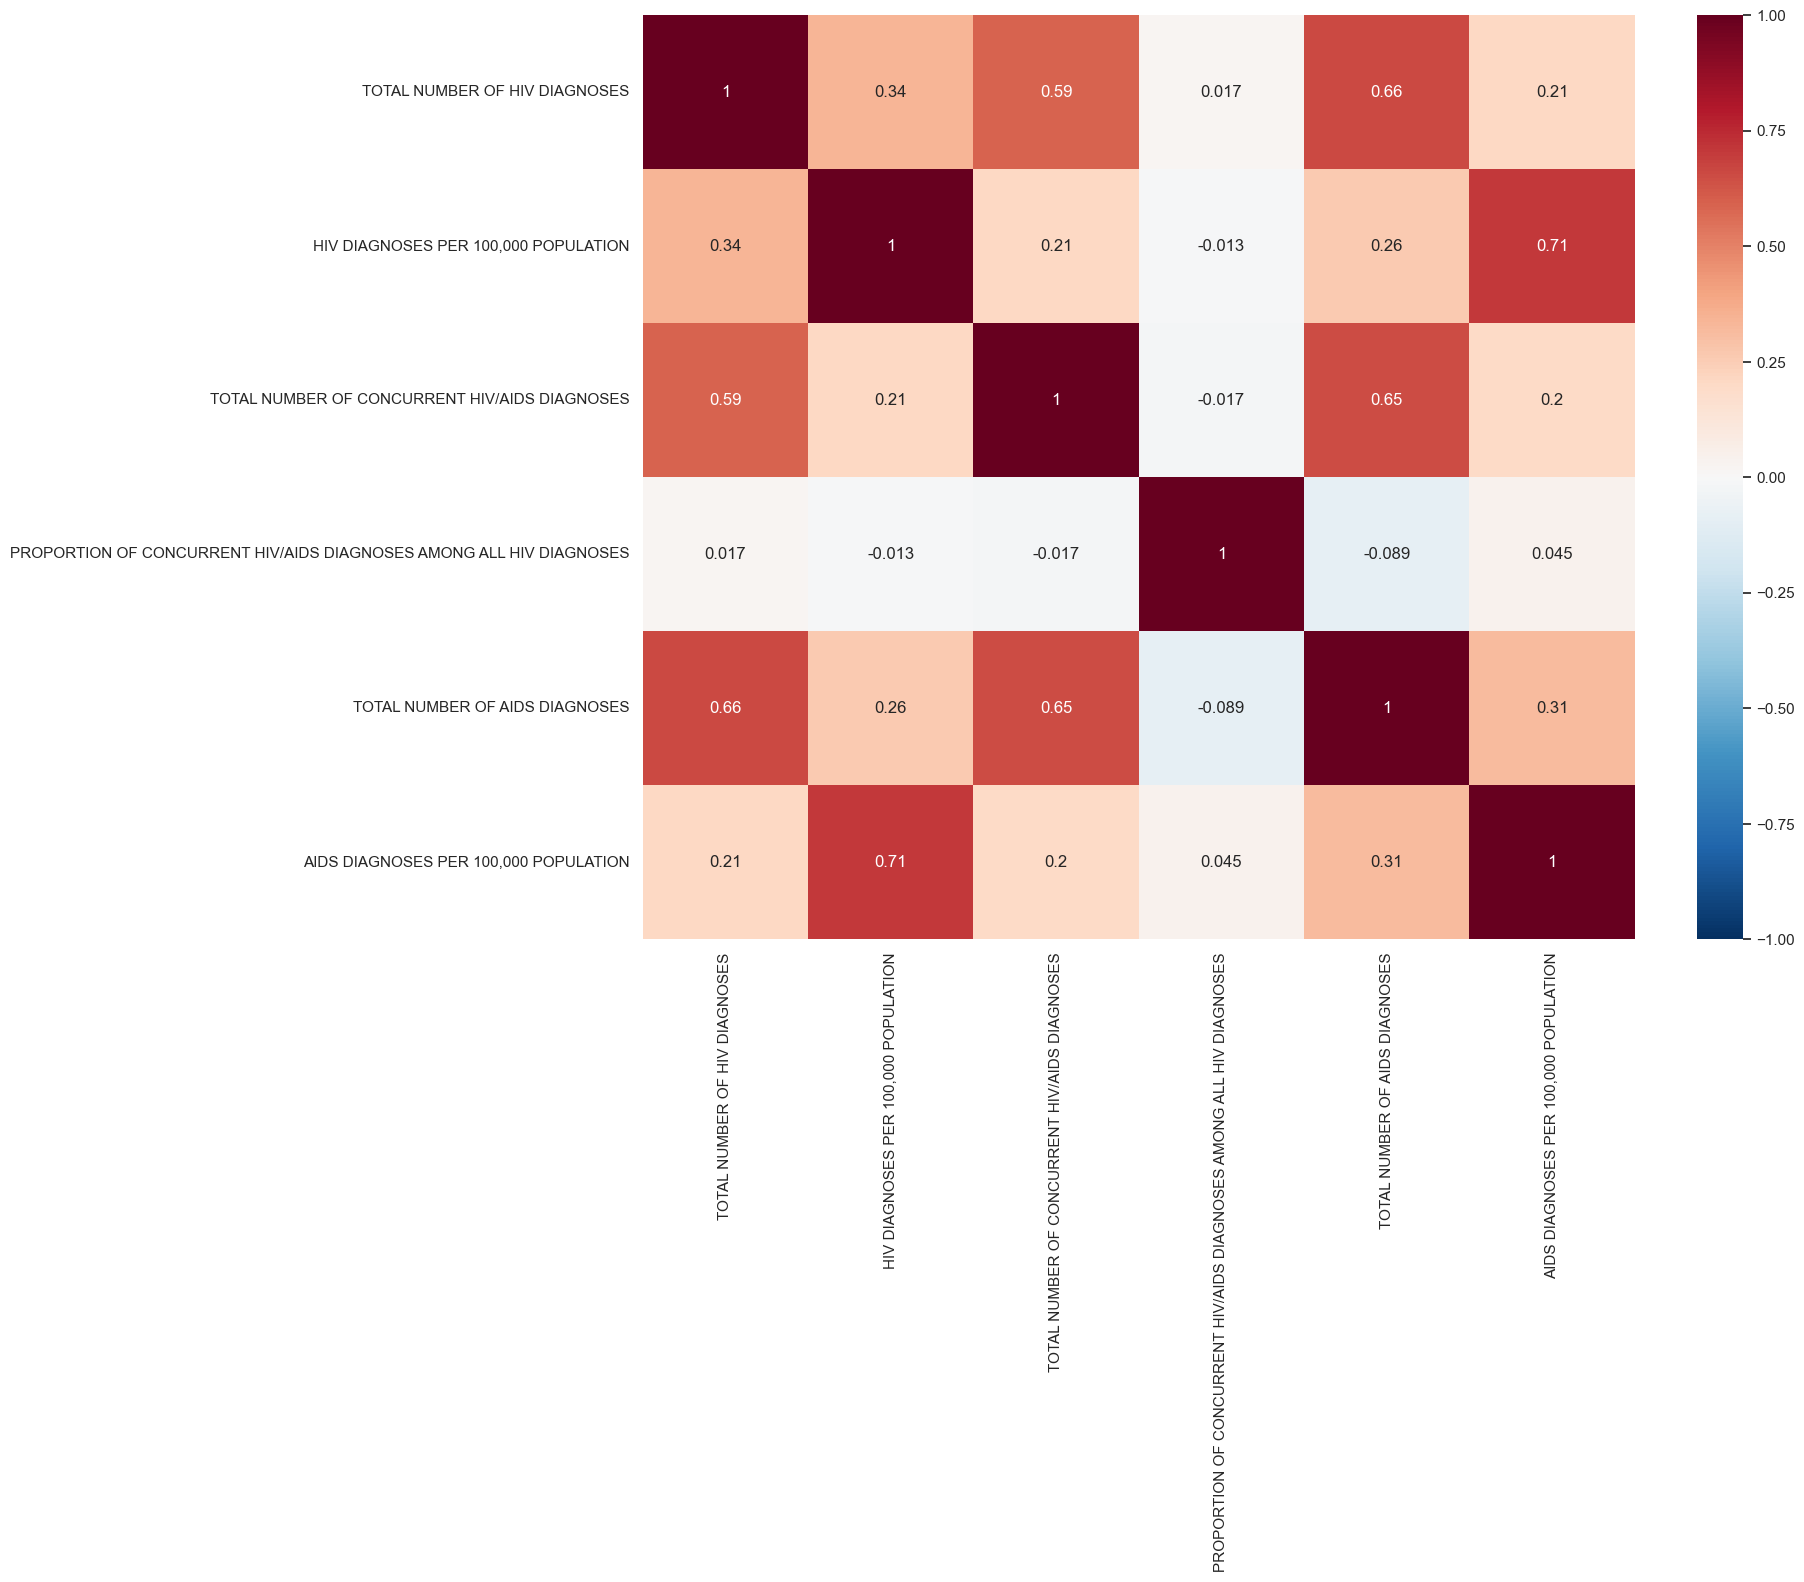

In [453]:
corr = df2[numerical_columns].corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

### Sanitize
The sanitize_filename function is designed to create clean and valid filenames by replacing any invalid characters, such as slashes, with underscores. This is particularly important when dealing with column names that may contain special characters that could interfere with file saving. By sanitizing the filenames, we ensure that the saved images have easily manageable names that won’t cause issues during file operations. This step helps maintain organization and prevents errors when saving visualizations based on the data columns.

Graphs were essential in this analysis because they provide a visual representation of the data that helps to reveal patterns, trends, and relationships that might not be immediately obvious from raw numbers alone. By visualizing the data, I can better understand how different variables interact with one another, particularly in relation to the total number of HIV diagnoses.

For instance, scatter plots allow me to see correlations between individual features and the target variable, while histograms and boxplots help illustrate the distribution and spread of the data. This visual approach not only makes it easier to identify outliers or anomalies but also aids in communicating findings to others more effectively.

Saving figure to: data/graphs/TOTAL NUMBER OF HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/HIV DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF CONCURRENT HIV_AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/PROPORTION OF CONCURRENT HIV_AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/AIDS DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.


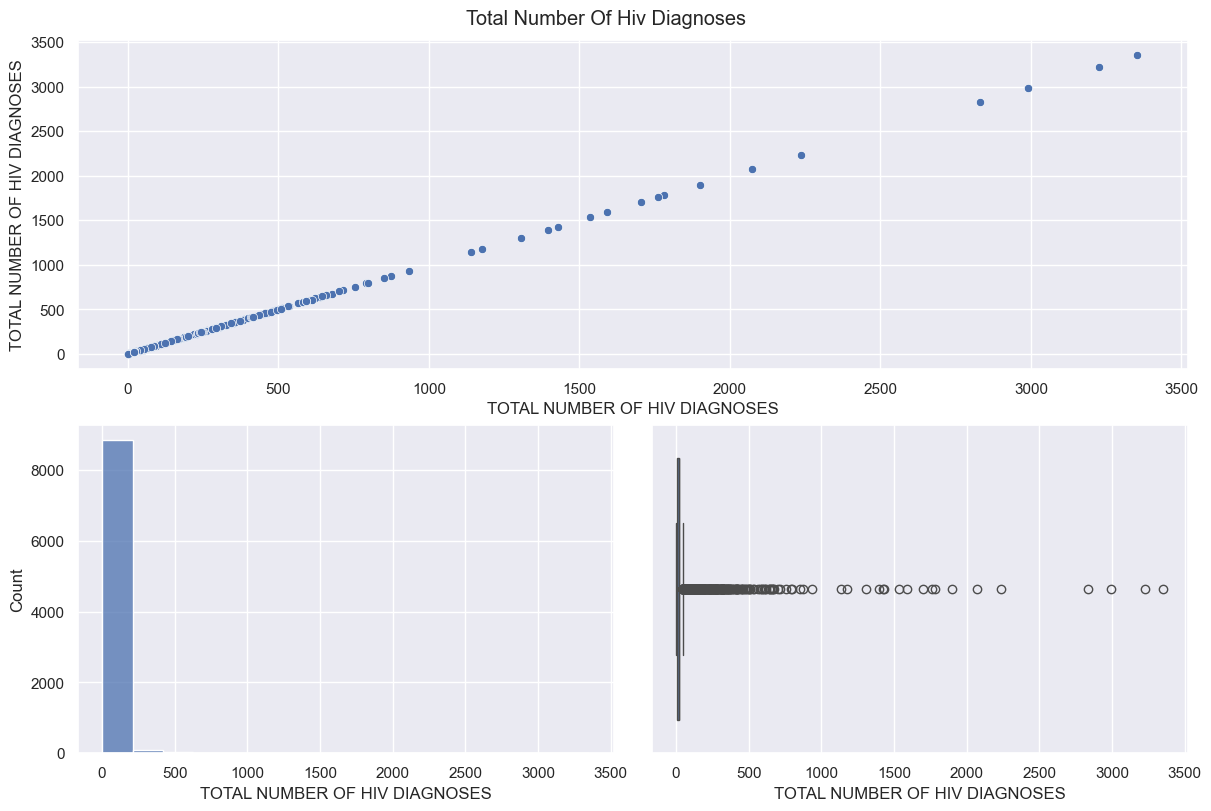

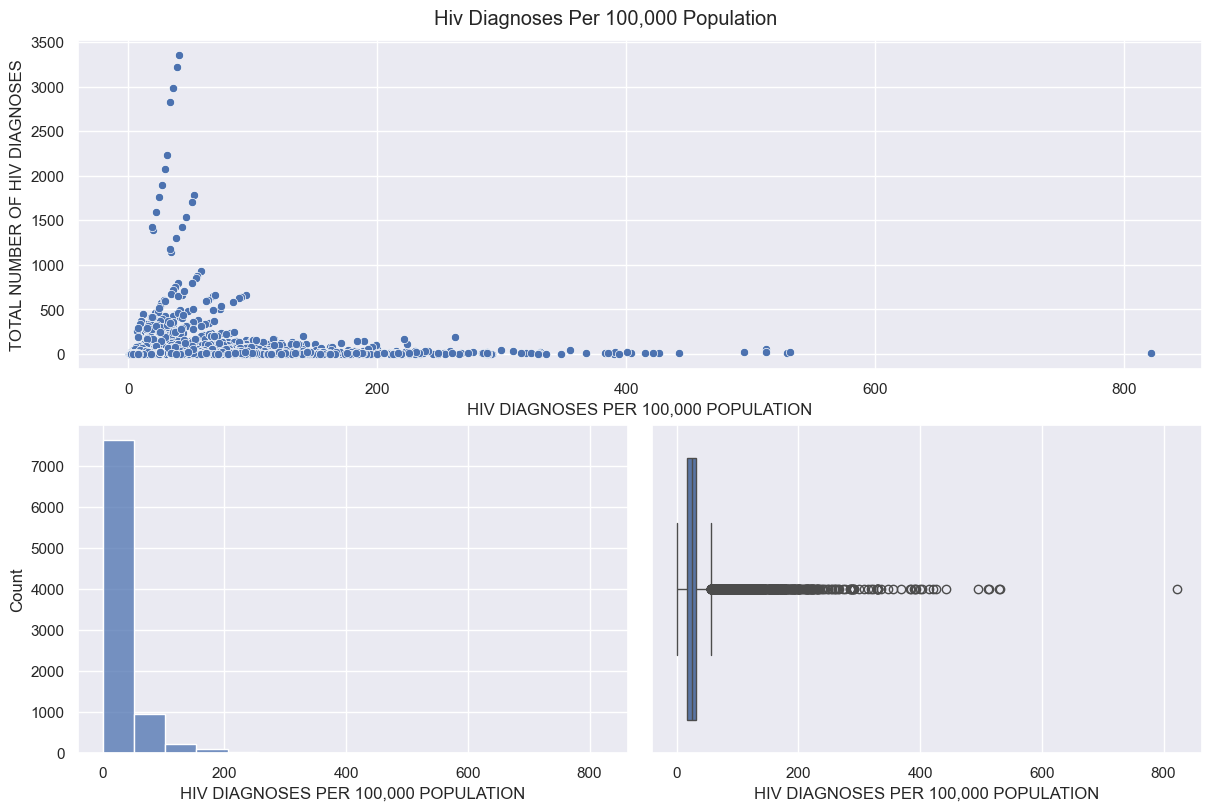

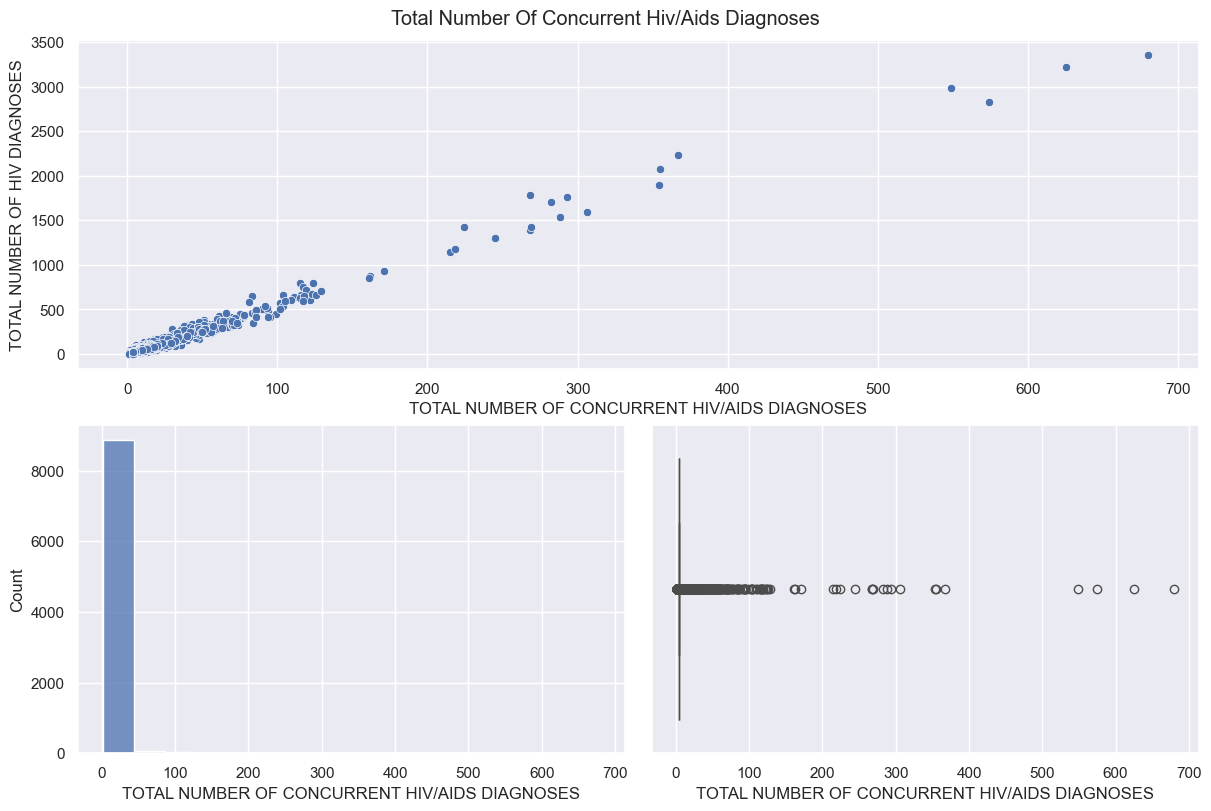

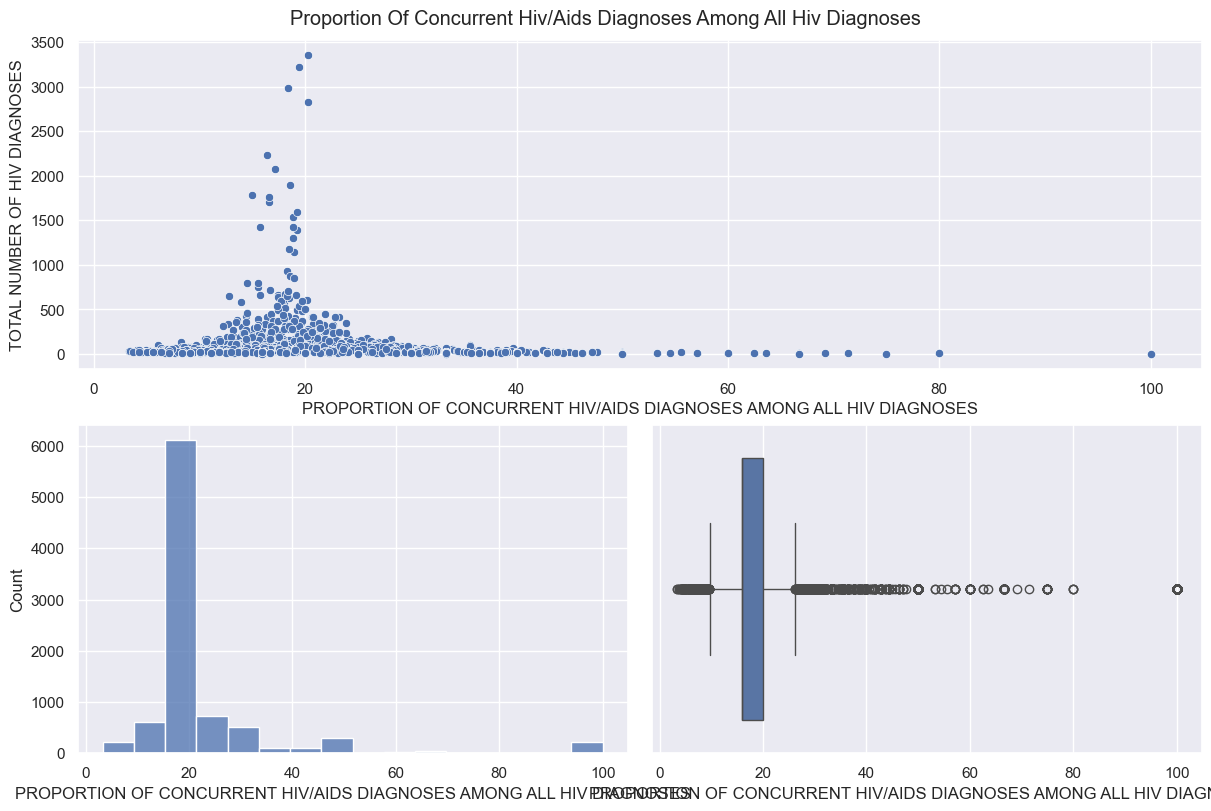

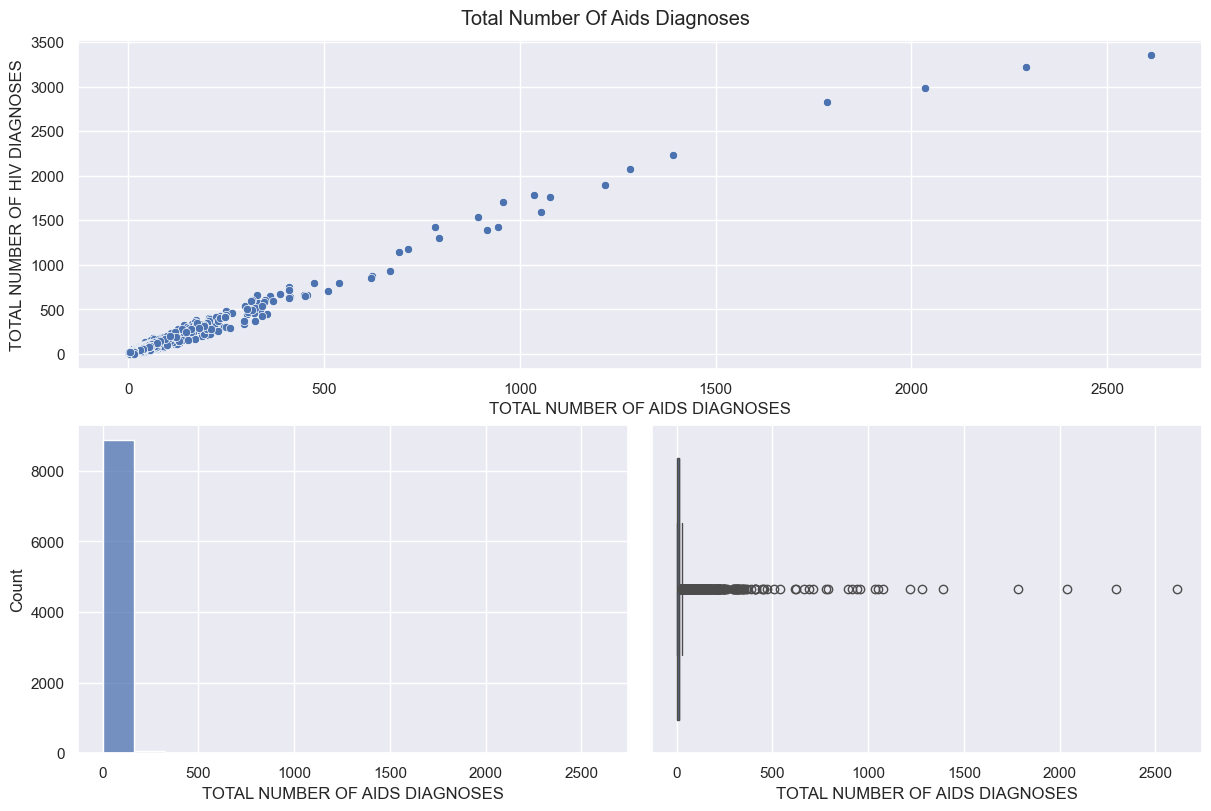

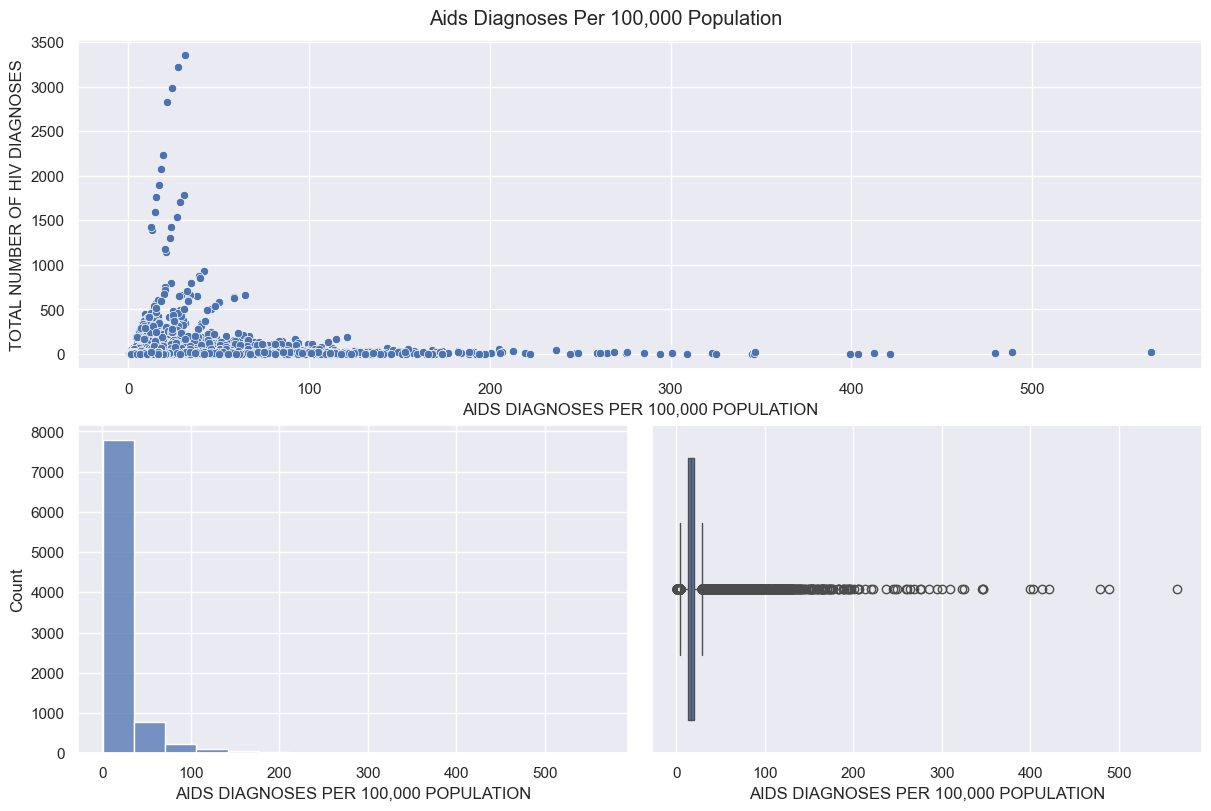

In [507]:
output_dir = 'data/graphs/'
#Function to sanitize filenames by replacing invalid characters, LIKE THE PROPORTION COLUMN AND CONCURRENT COLUMN
def sanitize_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')  # Replace invalid characters

columns = df2[numerical_columns].columns
for x_value in columns:
    sanitized_x_value = sanitize_filename(x_value)  # Clean the column name for the file name
    t_value = x_value.title()  # Convert column name to title case
    fig = plt.figure(figsize=(12, 8), constrained_layout=True) 
    gs = GridSpec(2, 2, figure=fig)
    
    save_path = os.path.join(output_dir, f"{sanitized_x_value}.png")
    print('Saving figure to:', save_path)

    # Create sub plots
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df2, x=x_value, y='TOTAL NUMBER OF HIV DIAGNOSES', ax=ax1)
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value, data=df2, bins=16, ax=ax2)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df2, x=x_value, orient='h', ax=ax3)

    fig.suptitle(t_value)
    fig.savefig(save_path, format='png')
    print('Figure saved successfully.')

We're executing this code to understand how different numerical features relate to the total number of HIV diagnoses. By looking at the correlation values, we can identify which variables have the strongest relationships with the number of diagnoses. This insight helps us determine which features might be the most important for our analysis or predictive modeling.

For instance, if a certain feature shows a high correlation, it could be a key factor influencing the number of HIV diagnoses. On the other hand, features with low correlation might not provide much value in our analysis. Overall, this step helps us focus our attention on the most relevant variables, ensuring that we're using the right data to make informed conclusions.

In [455]:
abs_corr = df2[numerical_columns].corr()['TOTAL NUMBER OF HIV DIAGNOSES'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='TOTAL NUMBER OF HIV DIAGNOSES', axis=1, inplace=True)

In [456]:
abs_corr

TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0.989571
TOTAL NUMBER OF AIDS DIAGNOSES                                         0.988883
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0.055142
HIV DIAGNOSES PER 100,000 POPULATION                                   0.038838
AIDS DIAGNOSES PER 100,000 POPULATION                                  0.025342
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

Choose the highest coefficient which means the stronger correlation between total number of hiv diagnoses and the other variables


In [511]:
concurrentHIV_skew = df2['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].skew()
diagnose_AIDS_skew= df2['TOTAL NUMBER OF AIDS DIAGNOSES'].skew()


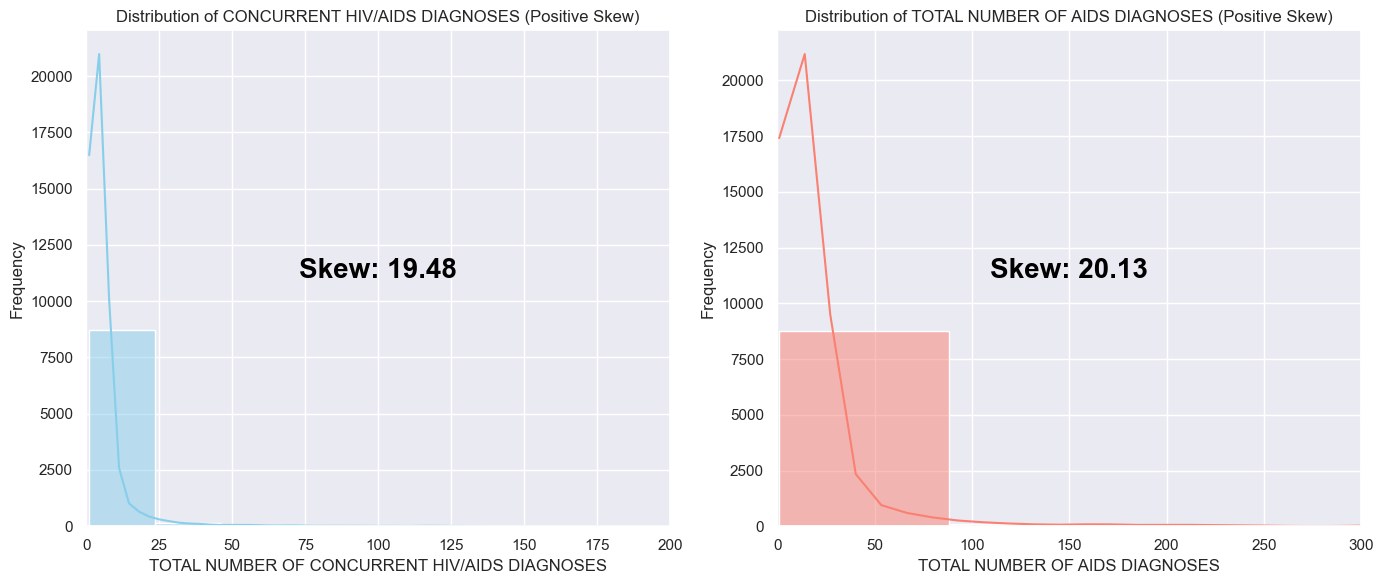

In [512]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES
sns.histplot(df2['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'], kde=True, ax=ax[0], color='skyblue', bins=30)
ax[0].set_title('Distribution of CONCURRENT HIV/AIDS DIAGNOSES (Positive Skew)', fontsize=12)
ax[0].set_xlabel('TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES')
ax[0].set_ylabel('Frequency')
ax[0].text(0.5, 0.5, f'Skew: {concurrentHIV_skew:.2f}', transform=ax[0].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=20)

# Set x-axis limits for zoom
ax[0].set_xlim(left=0, right=200)  # Adjust these values based on your data

# Histogram for TOTAL NUMBER OF AIDS DIAGNOSES
sns.histplot(df2['TOTAL NUMBER OF AIDS DIAGNOSES'], kde=True, ax=ax[1], color='salmon', bins=30)
ax[1].set_title('Distribution of TOTAL NUMBER OF AIDS DIAGNOSES (Positive Skew)', fontsize=12)
ax[1].set_xlabel('TOTAL NUMBER OF AIDS DIAGNOSES')
ax[1].set_ylabel('Frequency')
ax[1].text(0.5, 0.5, f'Skew: {diagnose_AIDS_skew:.2f}', transform=ax[1].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=20)

# Set x-axis limits for zoom
ax[1].set_xlim(left=0, right=300)  # Adjust these values based on your data

plt.tight_layout()
plt.show()

#### Data Transformations ####
- Parametric tests expect a normal distribution
- Transformations can reduce the impact of outliers on models
  
We're executing this code to gain a deeper understanding of the summary statistics for two key
variables: the total number of concurrent HIV/AIDS diagnoses and the total number of AIDS    diagnoses. By calling the describe() method, we can quickly see important information such as the mean, median, minimum, and maximum values, as well as the spread of the data. This summary helps us assess the overall distribution and identify any potential outliers or anomalies.
    
Next, we're applying a logarithmic transformation to both variables. This step is particularly useful when dealing with skewed data, as it helps to normalize the distribution. By taking the logarithm, we can reduce the impact of extreme values and make the data more suitable for modeling. This transformation can enhance the performance of our machine learning algorithms and lead to better predictions. Overall, these steps are aimed at preparing our data for more effective analysis and modeling.

In [529]:
print(df2[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'TOTAL NUMBER OF AIDS DIAGNOSES']].describe())
df2['log_concurrent'] = np.log(df2['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
df2['log_aids'] = np.log(df2['TOTAL NUMBER OF AIDS DIAGNOSES'])


       TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
count                                    8976.000000   
mean                                        6.126767   
std                                        19.355548   
min                                         1.000000   
25%                                         3.924209   
50%                                         3.924209   
75%                                         3.924209   
max                                       680.000000   

       TOTAL NUMBER OF AIDS DIAGNOSES  
count                     8976.000000  
mean                        19.142522  
std                         69.212677  
min                          1.000000  
25%                          4.000000  
50%                         13.517684  
75%                         13.517684  
max                       2611.000000  


In [531]:
concurrentHIV_skew = df2['log_concurrent'].skew()
diagnose_AIDS_skew = df2['log_aids'].skew()
print("Concurrent Diagnoses Skewness after Log Transformation:", concurrentHIV_skew)
print("AIDS diagnoses Skewness after Log Transformation:", diagnose_AIDS_skew)

Concurrent Diagnoses Skewness after Log Transformation: 1.0705541352008547
AIDS diagnoses Skewness after Log Transformation: -0.07386279229548387


# Task 3 -> Regression Analysis

In [518]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [519]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 4   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 5   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 6   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  8976 non-null   float64
 7   TOTAL 

In [520]:
print("Intercept:", linModel.intercept_)
print("Coefficients:", linModel.coef_)


Intercept: [-4.35950083]
Coefficients: [[ 5.38257457 -1.40315257]]


In [521]:
df2.describe()

,YEAR,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",log_concurrent,log_diagnosesper100,log_aids
count,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000
mean,2016.360963,28.406931,34.076540,6.126767,21.499938,19.142522,22.895398,1.309484,3.198976,3.133157
std,3.703894,105.275698,40.182161,19.355548,15.605703,69.212677,29.094193,0.777072,0.843422,0.915543
min,2010.000000,1.000000,0.300000,1.000000,3.300000,1.000000,0.300000,0.000000,0.262364,-1.203973
25%,2013.000000,4.000000,16.800000,3.924209,15.869044,4.000000,13.500000,1.367165,2.879198,2.821379
50%,2017.000000,21.010268,25.241048,3.924209,15.869044,13.517684,16.194570,1.367165,3.267325,3.228472
75%,2020.000000,21.010268,32.800000,3.924209,20.000000,13.517684,19.500000,1.367165,3.520461,3.490429
max,2021.000000,3353.000000,821.600000,680.000000,100.000000,2611.000000,565.500000,6.522093,6.712470,6.711254


In [522]:
# Define features (X) and target variable (y)
X = df2[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'RACE/ETHNICITY_Black']].values
y = df2['TOTAL NUMBER OF HIV DIAGNOSES'].values.reshape(-1, 1)

In [534]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted Total Number of HIV Diagnoses = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES)",
    " + ",
    linModel.coef_[0][1],
    "* (RACE/ETHNICITY_Black)"
)


Predicted Total Number of HIV Diagnoses =  -4.3595008275156175  +  5.38257457051027 * (TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES)  +  -1.4031525711023625 * (RACE/ETHNICITY_Black)


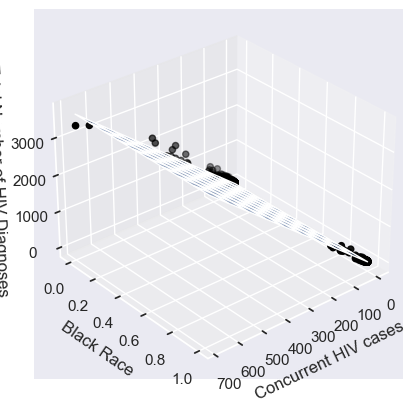

In [535]:
conc = trainX.iloc[:, 0]  # Replace 0 with the index of your chosen feature
black = trainX.iloc[:, 1]  # Replace 1 with the index of your chosen feature
y_train_flat = trainY  # This is already flat since it is (7180,)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter3D(conc, black, y_train_flat, color="Black")

# Create a meshgrid for the regression surface
xDeltaconc, xDeltablack = np.meshgrid(
    np.linspace(conc.min(), conc.max(), 10),  # Use more points for a smoother surface
    np.linspace(black.min(), black.max(), 10),
)

# Compute the regression surface
yDeltaTotal = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaconc
    + linModel.coef_[0][1] * xDeltablack
)

# Plot the regression surface
ax.plot_surface(xDeltaconc, xDeltablack, yDeltaTotal, alpha=0.5)

# Set the axes labels
ax.set_xlabel('Concurrent HIV cases')  # Change this label based on the feature you chose
ax.set_ylabel('Black Race')  # Change this label based on the feature you chose
ax.set_zlabel('Total Number of HIV Diagnoses')  # Change this to your y variable name

# Set the view angle
ax.view_init(30, 50)

# Show the plot
plt.show()

In [525]:
# Show the 3D plot
plt.show()

In [526]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
r_squared = linModel.score(X, y)
print(f"Proportion of variation explained by the model (R^2): {r_squared:.4f}")

Proportion of variation explained by the model (R^2): 0.9793


We're creating this boxplot to visually compare the total number of HIV diagnoses between two groups: Black individuals and Non-Black individuals. By displaying the data this way, we can easily see the distribution of HIV diagnoses within each group, including the median, quartiles, and any potential outliers.

Boxplots are particularly useful for highlighting differences between groups, as they provide a clear summary of the central tendency and variability in the data. In this case, we want to understand if there are significant disparities in HIV diagnoses based on race/ethnicity.

By examining the boxplot, we can quickly assess whether one group tends to have higher or lower totals than the other, as well as how spread out the data is within each group. This information can help inform public health strategies and initiatives aimed at addressing HIV disparities in different populations. Overall, this visual comparison allows us to gain insights that could lead to more targeted interventions.

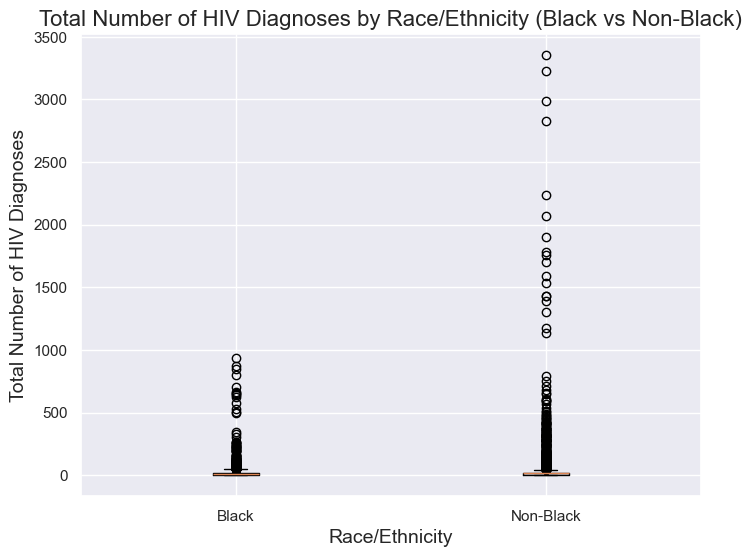

In [532]:
# Plot a boxplot to compare the total number of HIV diagnoses between Black and Non-Black groups
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df2[df2['RACE/ETHNICITY_Black'] == 1]['TOTAL NUMBER OF HIV DIAGNOSES'],
     df2[df2['RACE/ETHNICITY_Black'] == 0]['TOTAL NUMBER OF HIV DIAGNOSES']],
    tick_labels=['Black', 'Non-Black']
)

plt.xlabel('Race/Ethnicity', fontsize=14)
plt.ylabel('Total Number of HIV Diagnoses', fontsize=14)
plt.title('Total Number of HIV Diagnoses by Race/Ethnicity (Black vs Non-Black)', fontsize=16)
plt.show()


In this code, we start by using the best model identified through grid search, which optimizes the model parameters for our dataset. We then make predictions on the test set using this optimized model, which allows us to assess how well our model generalizes to unseen data. To evaluate the performance of our model, we calculate two metrics: the Mean Absolute Error (MAE), which provides an average of how far off our predictions are from the actual values.
And the R² score, which tells us how well the model explains the variance in the target variable. After printing these evaluation results, we prepare data for a specific prediction by constructing a DataFrame that includes values for 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES' and 'RACE/ETHNICITY_Black.' Finally, we use the trained model to predict the total number of HIV diagnoses for a hypothetical patient with specified characteristics, providing valuable insight into how the model can be applied in real-world scenarios.

In [533]:
# Use the best model to predict on the test set
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(testX)

# Calculate evaluation metrics
mae = mean_absolute_error(testY, y_pred)
mse = mean_squared_error(testY, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(testY, y_pred)

# Print the results of model evaluation
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R²: {r2}')

#list of feautures
feature_names = ['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'RACE/ETHNICITY_Black']

# Construct the DataFrame for prediction using the exact names
prediction_data = {
    'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES': [20],  # Number of concurrent HIV cases
    'RACE/ETHNICITY_Black': [1]  # Black as 1
}

# Convert the dictionary to DataFrame
prediction_df = pd.DataFrame(prediction_data)

# Make a prediction using the adjusted DataFrame
yMultyPredicted = best_model.predict(prediction_df)

# Print only the predicted total number of concurrent HIV/AIDS diagnoses
print(f"Predicted Total Number of HIV Diagnoses for a patient with 20 concurrent HIV cases, Race = Black:\n{round(yMultyPredicted[0], 2)}")

Mean Absolute Error (MAE): 9.021331006243893
R²: 0.9857948381445489
Predicted Total Number of HIV Diagnoses for a patient with 20 concurrent HIV cases, Race = Black:
93.81


-In conclusion, the evaluation of our model yielded a Mean Absolute Error (MAE) of approximately 9.02, indicating that on average, our predictions deviate by about 9 diagnoses from the actual values. This level of error, while it may seem significant, can largely be attributed to the initial data preprocessing step where we filled 0 values with mean values. This method, while necessary to avoid complications from dividing by zero, can introduce bias into the dataset and potentially affect the model's performance by oversimplifying the variability in the data.

-On a more positive note, the R² score of 0.986 demonstrates that our model explains a substantial portion of the variance in the total number of HIV diagnoses, suggesting a strong fit to the data. However, it's essential to recognize that an R² close to 1.0, such as 0.98, might indicate overfitting, where the model captures noise rather than the underlying data trends. Ultimately, our model predicted that for a patient with 20 concurrent HIV cases, who identifies as Black, the total number of HIV diagnoses would be approximately 93.81. This prediction provides valuable insight, but further refinement in data handling and model tuning could help reduce the MAE and enhance the model's reliability.